In [4]:
#import pandas
import pandas as pd
#import numpy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [5]:
df = pd.read_csv('Breast_cancer.csv')

df.head
df.info

<bound method DataFrame.info of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0

In [5]:
# counting values of variables in 'diagnosis'
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

C:\Users\99\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


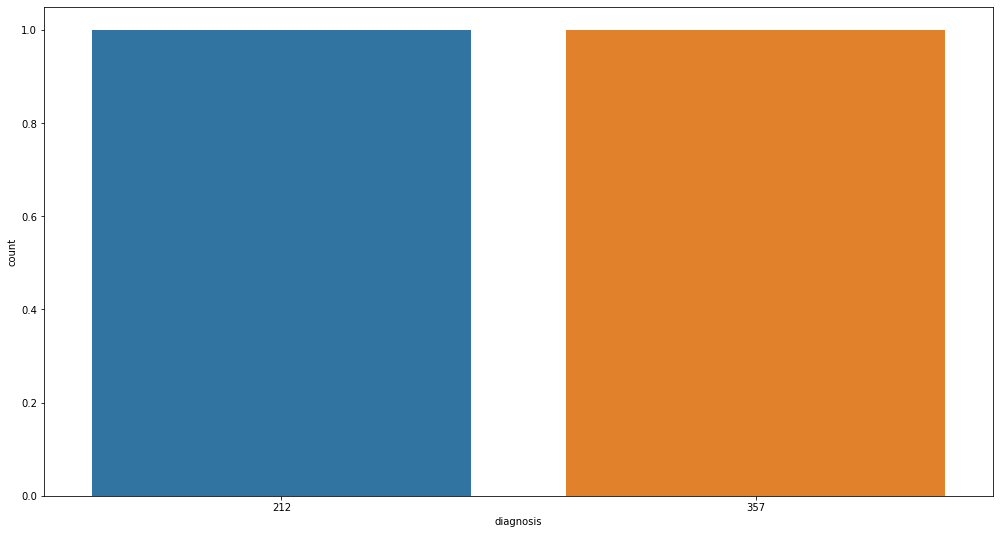

In [6]:
plt.figure(figsize=[17,9])
sb.countplot(df['diagnosis'].value_counts())
plt.show()

In [7]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [8]:
#droping feature
df.drop(['Unnamed: 32','id'],axis=1,inplace=True)

In [9]:
# independent variables
x = df.drop('diagnosis',axis=1)
#dependent variables
y = df.diagnosis

In [10]:
from sklearn.preprocessing import LabelEncoder
#creating the object
lb = LabelEncoder()
y = lb.fit_transform(y)

In [11]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=40)

In [12]:
#importing StandardScaler
from sklearn.preprocessing import StandardScaler
#creating object
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

In [13]:
#importing keras
import keras
#importing sequential module
from keras.models import Sequential
# import dense module for hidden layers
from keras.layers import Dense
#importing activation functions
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [14]:
#creating model
classifier = Sequential()

In [15]:
#first hidden layer
classifier.add(Dense(units=9,kernel_initializer='he_uniform',activation='relu',input_dim=30))
#second hidden layer
classifier.add(Dense(units=9,kernel_initializer='he_uniform',activation='relu'))
# last layer or output layer
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))

In [16]:
#taking summary of layers
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 9)                 279       
                                                                 
 dense_1 (Dense)             (None, 9)                 90        
                                                                 
 dense_2 (Dense)             (None, 1)                 10        
                                                                 
Total params: 379
Trainable params: 379
Non-trainable params: 0
_________________________________________________________________


In [17]:
#compiling the ANN
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [18]:
#fitting the ANN to the training set
model = classifier.fit(xtrain,ytrain,batch_size=100,epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 8ms/step - loss: 0.8606 - accuracy: 0.4950
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8034 - accuracy: 0.5226
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7520 - accuracy: 0.5452
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7074 - accuracy: 0.5854
Epoch 5/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6685 - accuracy: 0.6206
Epoch 6/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6340 - accuracy: 0.6508
Epoch 7/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6019 - accuracy: 0.6935
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5754 - accuracy: 0.7136
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 0.5511 - accuracy: 0.7412
Epoch 10/100
4/4 [==============================] - 0s 2ms/step - loss: 0.5292 - accuracy: 0.7613
Epoch 11/100
4/4 [===========

In [32]:
#now testing for Test data
y_pred = classifier.predict(xtest)

In [34]:
#converting values
y_pred = (y_pred>0.5)
print(y_pred)

[[False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 

In [35]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(ytest,y_pred)
score = accuracy_score(ytest,y_pred)
print(cm)
print('score is:',score)

[[115   0]
 [  4  52]]
score is: 0.9766081871345029


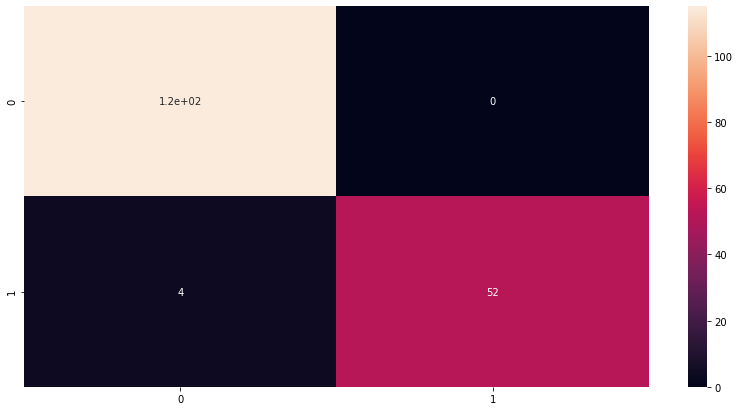

In [36]:
# creating heatmap of comfussion matrix
plt.figure(figsize=[14,7])
sb.heatmap(cm,annot=True)
plt.show()

dict_keys(['loss', 'accuracy'])


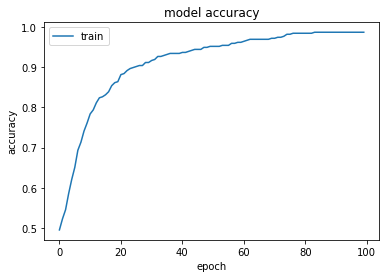

In [37]:
# list all data in history
print(model.history.keys())
# summarize history for accuracy
plt.plot(model.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

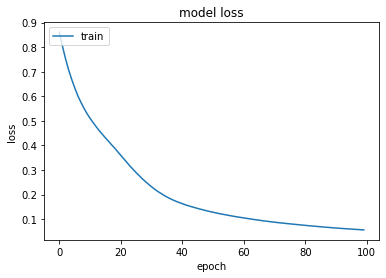

In [38]:
# summarize history for loss
plt.plot(model.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [39]:
#saving the model
classifier.save('File_name.h5')